In [210]:
import os
import cv2
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
import shutil
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2
from PIL import Image

In [236]:
from utils.data_preprocessing import categorizar

In [212]:
plt.figure(figsize=(15,15))

carpeta = 'raw_data/test_images/train_imgs/pistol'
imagenes = os.listdir(carpeta)

for i, nombreimg in enumerate(imagenes[:25]):
  plt.subplot(5,5,i+1)
  imagen = mpimg.imread(carpeta + '/' + nombreimg)
  plt.imshow(imagen)

FileNotFoundError: [Errno 2] No such file or directory: 'raw_data/test_images/train_imgs/pistol'

<Figure size 1500x1500 with 0 Axes>

In [213]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
#
datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=30,
    width_shift_range=0.25,
    height_shift_range=0.25,
    shear_range=15,
    zoom_range=[0.5, 1.5],
    validation_split=0.2 
)


In [214]:
print(len(os.listdir('raw_data/test_images/test_imgs/knife')))
print(len(os.listdir('raw_data/test_images/test_imgs/other')))
print(len(os.listdir('raw_data/test_images/test_imgs/pistol')))

225
132
78


In [215]:
print(len(os.listdir('raw_data/test_images/train_imgs/knife')))
print(len(os.listdir('raw_data/test_images/train_imgs/other')))
print(len(os.listdir('raw_data/test_images/train_imgs/pistol')))

781
1755
795


In [216]:
#train_dir = 'raw_data/test_images/train_imgs'
#test_dir = 'raw_data/test_images/test_imgs'

In [217]:
carpeta_fuente = 'raw_data/test_images/train_imgs/knife'
carpeta_destino = 'dataset/knife'
imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate(imagenes):
  if i < 781:
    #Copia de la carpeta fuente a la destino
    shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)

In [218]:
carpeta_fuente = 'raw_data/test_images/train_imgs/pistol'
carpeta_destino = 'dataset/pistol'
imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate(imagenes):
  if i < 781:
    #Copia de la carpeta fuente a la destino
    shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)

In [219]:
carpeta_fuente = 'raw_data/test_images/train_imgs/other'
carpeta_destino = 'dataset/other'
imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate(imagenes):
  if i < 781:
    #Copia de la carpeta fuente a la destino
    shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)

In [220]:
print(len(os.listdir('dataset/knife')))
print(len(os.listdir('dataset/other')))
print(len(os.listdir('dataset/pistol')))

781
781
781


In [221]:
data_gen_train = datagen.flow_from_directory(
    'dataset/',
    target_size=(224, 224),
    batch_size=32,
    shuffle=True,
    subset='training'
)

Found 1874 images belonging to 3 classes.


In [222]:
data_gen_test = datagen.flow_from_directory(
    'dataset/',
    target_size=(224, 224),
    batch_size=32,
    shuffle=True,
    subset='validation'
)

Found 468 images belonging to 3 classes.


In [223]:
1874 * 0.25

468.5

In [224]:
PATH ="raw_data/"
FILE="test_video.mp4"
VIDEO = PATH+FILE

In [225]:
#cap = cv2.VideoCapture(VIDEO)

# 1.test

# Model (clasificador más básico cómo opcion B)

In [228]:
import tensorflow as tf
import tensorflow_hub as hub
#este es el de fabi
url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
mobilenetv2 = hub.KerasLayer(url, input_shape=(224,224,3))
mobilenetv2.trainable = False
#mobilenetv2.weights = "imagenet"

In [230]:
model_reg = tf.keras.Sequential([
    mobilenetv2,
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(512, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    tf.keras.layers.Dense(3, activation='softmax')
])


In [ ]:
#https://www.kaggle.com/discussions/general/226433

In [231]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [232]:
#model_reg.trainable = False
model_reg.summary()


Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_6 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 batch_normalization_3 (Batc  (None, 1280)             5120      
 hNormalization)                                                 
                                                                 
 dense_43 (Dense)            (None, 512)               655872    
                                                                 
 dropout_17 (Dropout)        (None, 512)               0         
                                                                 
 dense_44 (Dense)            (None, 256)               131328    
                                                                 
 dropout_18 (Dropout)        (None, 256)               0         
                                                     

## Acá hay que seguir y ver la precision, comparar con un baseline

In [ ]:
#https://github.com/EhabR98/Transfer-Learning-with-MobileNetV2

In [233]:
model_reg.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [239]:
#Entrenar el modelo
EPOCHS = 50

historial = model_reg.fit(
    data_gen_train,
    epochs=EPOCHS,
    batch_size=30,
    validation_data=data_gen_test,
    callbacks=[early_stopping]
)

Epoch 1/50


2023-06-24 19:57:08.322030: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


KeyboardInterrupt: 

In [235]:
#model_reg.save('model_versions')

ValueError: x and y must have same first dimension, but have shapes (50,) and (14,)

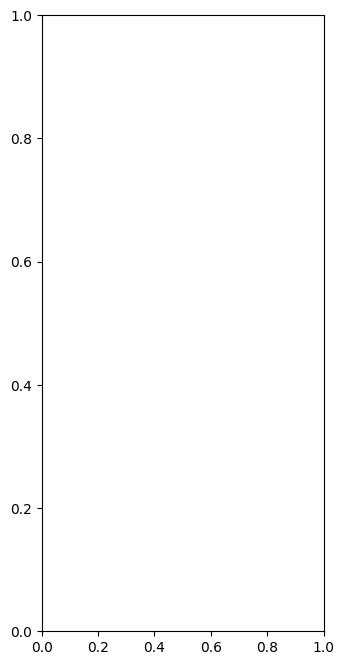

In [ ]:
acc = historial.history['accuracy']
val_acc = historial.history['val_accuracy']

loss = historial.history['loss']
val_loss = historial.history['val_loss']

rango_epocas = range(50)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(rango_epocas, acc, label='Precisión Entrenamiento')
plt.plot(rango_epocas, val_acc, label='Precisión Pruebas')
plt.legend(loc='lower right')
plt.title('Precisión de entrenamiento y pruebas')

plt.subplot(1,2,2)
plt.plot(rango_epocas, loss, label='Pérdida de entrenamiento')
plt.plot(rango_epocas, val_loss, label='Pérdida de pruebas')
plt.legend(loc='upper right')
plt.title('Pérdida de entrenamiento y pruebas')
plt.show()

In [ ]:
#overfitting.

In [237]:
image_url = 'raw_data/test_image_2.jpg'
predicted_class_index = categorizar(image_url,model_reg)
print('Predicted Class Index:', predicted_class_index)

1/1 [==============================] - 2s 2s/step
Predicted Class Index: 1


In [240]:
#AHORA SI, SEGUIR CON YOLO